In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

RDKit WARNING: [16:57:02] Enabling RDKit 2019.09.3 jupyter extensions


<class 'quantum_dataset.QM7'> dataset created...
epoch: 1 of 500, train loss: 1841411.0284090908, val loss: 1446560.125
epoch: 51 of 500, train loss: 13659.16162109375, val loss: 9856.5166015625
epoch: 101 of 500, train loss: 5126.8114457563925, val loss: 4288.7559814453125
epoch: 151 of 500, train loss: 4253.1013072620735, val loss: 4436.81103515625
epoch: 201 of 500, train loss: 3482.946433327415, val loss: 3671.6165771484375
epoch: 251 of 500, train loss: 3046.127363725142, val loss: 3008.8001708984375
epoch: 301 of 500, train loss: 3117.1090587269177, val loss: 2577.388671875
epoch: 351 of 500, train loss: 2861.231778231534, val loss: 2405.600830078125
epoch: 401 of 500, train loss: 2507.9460782137785, val loss: 2255.16455078125
epoch: 451 of 500, train loss: 2239.1336281516337, val loss: 1783.2509765625
test loss: 2315.59033203125
y_pred:
tensor([[-1372.6893],
        [-1630.3596],
        [-1677.4602],
        [-1104.7618],
        [-1772.3390],
        [-1173.4767],
        [-10

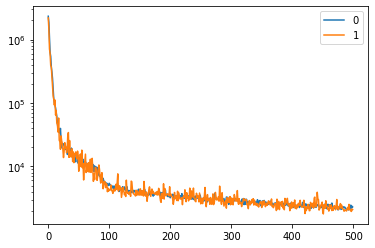

learning time: 0:06:44.469800


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'wave'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=256, epochs=500, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'narrow'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=256, epochs=100, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'straight'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=256, epochs=500, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 'H': 4096, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, 
      Optimizer=Adam, Criterion=MSELoss, batch_size=256, epochs=100, 
      opt_params=opt_params, model_params=model_params, ds_params=ds_params, 
      crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+29+14, 'H': 1024, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb','mulliken','A','B','C','alpha','homo',
                          'lumo','gap','r2','zpve','H','U0','U','G','Cv'], 
             'target': 'mu',
             'dim': 29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=512, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': .1}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

In [ ]:
model_params = {'D_in': 128+32+64+32+64, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20200603_1206.pth', adapt=False)

In [ ]:
ds_params = {'n': 133885, 
             'features': ['coulomb','mulliken','A','B','C','alpha','homo',
                          'lumo','gap','r2','zpve','H','U0','U','G','Cv'], 
             'target': 'mu',
             'dim': 29,
             'use_pickle': True}
q = QM9(**ds_params)